# TIỂU LUẬN CUỐI KÌ
# Môn học: KHOA HỌC DỮ LIỆU
## Tên đề tài: Dự đoán số lượng sản phẩm đã bán tại tiki.vn

## Nhóm 14: Nguyễn Thanh Khải

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected"
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('E:\KHDL\data\output1.csv')
df.head()

,Unnamed: 0,id,name,type,price,original_price,discount,discount_rate,rating_average,review_count,productset_group_name,day_ago_created,all_time_quantity_sold
0,0,148803925,Giày chạy bộ nam New Balance Classic - ML574,configurable,1537000,2195000,658000,30,5.0,9,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,185.0,15.0
1,1,131347928,Giày Thể Thao Nam Biti’s Hunter X Z MIDNIGHT B...,configurable,1207000,1207000,0,0,4.7,372,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,238.0,752.0
2,2,56339896,Xe máy điện VinFast Klara S,configurable,39900000,39900000,0,0,4.6,513,Ô Tô - Xe Máy - Xe Đạp/Xe điện/Xe máy điện,734.0,1175.0
3,3,118281790,Giày Thể Thao Nam Biti’s Hunter X Z Collection...,configurable,1086000,1207000,121000,10,4.6,38,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,301.0,71.0
4,4,37468142,Giày thể thao nam IKEN S&B - Xanh Dương,configurable,699000,699000,0,0,1.0,1,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,965.0,10.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1000 non-null   int64  
 1   id                      1000 non-null   int64  
 2   name                    1000 non-null   object 
 3   type                    1000 non-null   object 
 4   price                   1000 non-null   int64  
 5   original_price          1000 non-null   int64  
 6   discount                1000 non-null   int64  
 7   discount_rate           1000 non-null   int64  
 8   rating_average          1000 non-null   float64
 9   review_count            1000 non-null   int64  
 10  productset_group_name   1000 non-null   object 
 11  day_ago_created         999 non-null    float64
 12  all_time_quantity_sold  245 non-null    float64
dtypes: float64(3), int64(7), object(3)
memory usage: 101.7+ KB


### Lọc ra những sản phẩm đã được bán hơn 100 lần

In [4]:
mostSold = df[df['all_time_quantity_sold']>=100]
mostSold

,Unnamed: 0,id,name,type,price,original_price,discount,discount_rate,rating_average,review_count,productset_group_name,day_ago_created,all_time_quantity_sold
1,1,131347928,Giày Thể Thao Nam Biti’s Hunter X Z MIDNIGHT B...,configurable,1207000,1207000,0,0,4.7,372,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,238.0,752.0
2,2,56339896,Xe máy điện VinFast Klara S,configurable,39900000,39900000,0,0,4.6,513,Ô Tô - Xe Máy - Xe Đạp/Xe điện/Xe máy điện,734.0,1175.0
5,5,5204861,Giày Thể Thao Nam Biti’s Hunter X – 2K18 – DSU...,configurable,885000,932000,47000,5,5.0,64,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,1353.0,134.0
30,30,42688299,Khô bò giòn vừa S'Shop lon nhôm 250g,simple,130000,130000,0,0,4.2,19,Bách Hóa Online/Thực phẩm/Thực phẩm khô/Thực p...,925.0,174.0
35,35,103773704,Giày Thể Thao Nam Biti's Hunter X 2k19 - DSMH0...,configurable,885000,932000,47000,5,4.7,65,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,374.0,126.0
43,43,44888793,Khô gà lá chanh S'Shop 1kg siêu sạch,simple,250000,250000,0,0,4.1,19,Bách Hóa Online/Thực phẩm/Thực phẩm khô/Thực p...,908.0,130.0
56,56,8211858,Sủi Da S-506 - Kềm Nghĩa,simple,65000,65000,0,0,4.8,44,Làm Đẹp - Sức Khỏe/Dụng cụ làm đẹp/Chăm sóc mó...,1274.0,308.0
61,61,65461111,Giày Thể Thao Nam Biti's Hunter X 2k20 DSMH03400,configurable,909000,1010000,101000,10,4.8,173,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,650.0,390.0
72,72,97066811,Giày Thể Thao Cao Cấp Nam Biti's Hunter X Army...,configurable,960000,1010000,50000,5,4.8,186,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,392.0,442.0
76,76,1416813,Giày Thượng Đình KK14-1 White,configurable,102900,102900,0,0,4.5,58,Thể Thao - Dã Ngoại/Giày thể thao nam/Giày chạ...,1597.0,203.0


### Gán nhãn số cho cột 'productset_group_name' và lưu vào cột mới 'gr_name'

In [5]:
lookupTable, indexed_dataSet = np.unique(df['productset_group_name'], return_inverse=True)
df['gr_name'] = indexed_dataSet
df['gr_name']

0      243
1      243
2      319
3      243
4      243
      ... 
995    274
996    254
997     33
998    268
999    168
Name: gr_name, Length: 1000, dtype: int64

### Biểu đồ biểu diễn số lượng đã bán và nhóm của sản phẩm 

In [6]:
fig = px.bar(mostSold, x='name',y='all_time_quantity_sold', color='productset_group_name')
fig.show()

### Biểu đồ biểu diễn điểm đánh giá và tỉ lệ discount của các sản phẩm 

In [7]:
fig = px.bar(mostSold, x='name', y= 'rating_average', color='discount_rate')
fig.show()

### Biểu đồ biểu diễn số lượng đánh giá của sản phẩm

Text(0, 0.5, 'count')

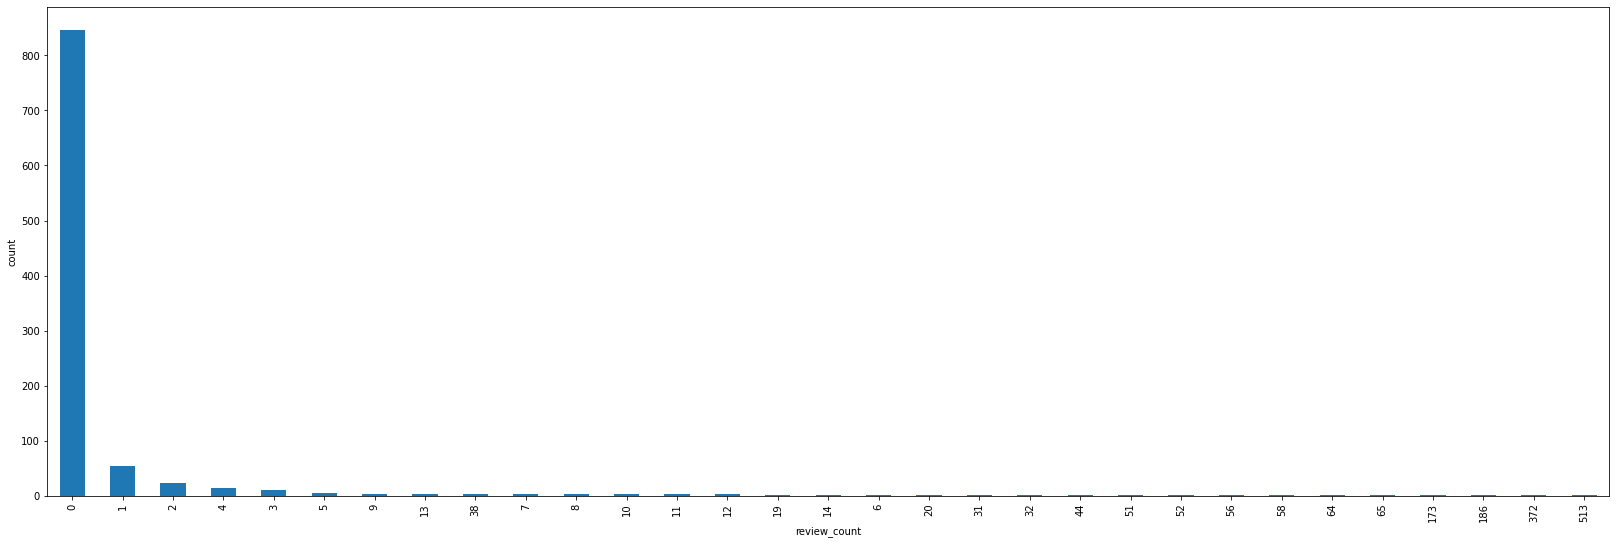

In [8]:
plt.figure(figsize = (28,9))
df.review_count.value_counts().plot(kind='bar')
plt.xlabel('review_count')
plt.ylabel('count')

### Biểu đồ biểu diễn số lượng điểm đánh giá của sản phẩm

Text(0, 0.5, 'count')

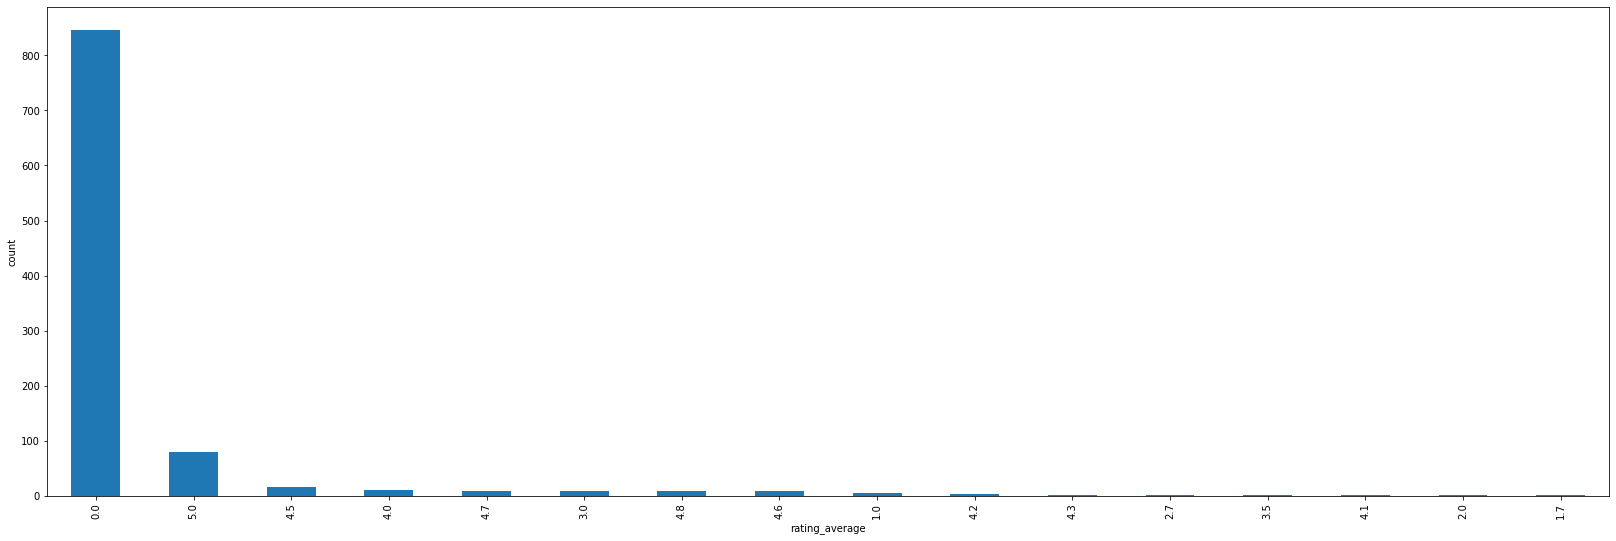

In [9]:
plt.figure(figsize = (28,9))
df.rating_average.value_counts().plot(kind='bar')
plt.xlabel('rating_average')
plt.ylabel('count')

### Các biểu đồ tròn thể hiện số lượng điểm đánh giá, discount, review của sản phẩm

<AxesSubplot:ylabel='review_count'>

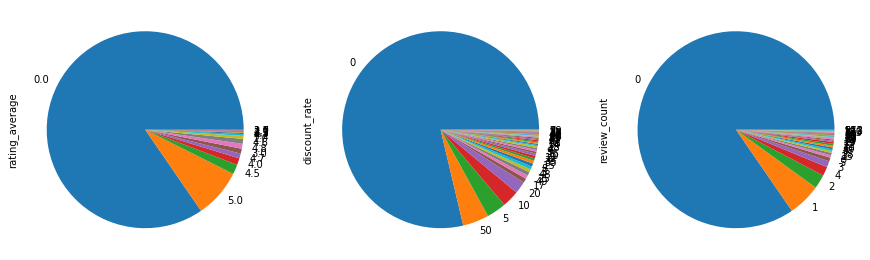

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(131)
df['rating_average'].value_counts().plot(kind = 'pie')
plt.subplot(132)
df['discount_rate'].value_counts().plot(kind = 'pie')
plt.subplot(133)
df['review_count'].value_counts().plot(kind = 'pie')

### Pairplot thể hiện độ tương quan giữa các đặc trưng 

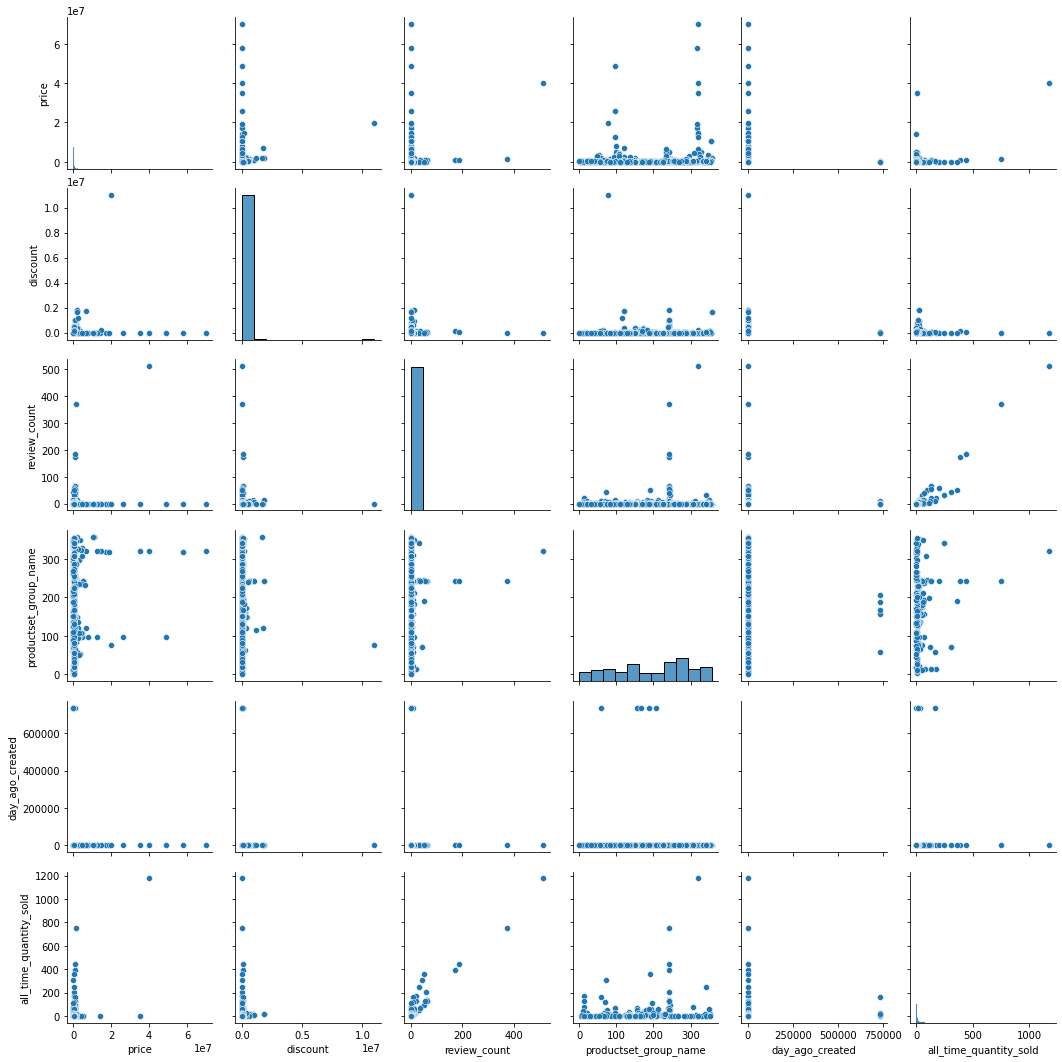

In [31]:
df1=pd.read_csv('E:\KHDL\data\output1.csv', usecols=['review_count','price','day_ago_created', 'discount', 'all_time_quantity_sold', 'productset_group_name'])
lookupTable, indexed_dataSet = np.unique(df['productset_group_name'], return_inverse=True)
df1['productset_group_name'] = indexed_dataSet
sns.pairplot(df1)

### Xử lý các dữ liệu trống

In [12]:
median=df['day_ago_created'].median() 
df['day_ago_created']=df['day_ago_created'].fillna(median)

In [13]:
df['all_time_quantity_sold']=df['all_time_quantity_sold'].fillna(0)

### Chọn ra các đặc trưng để tiến hành huấn luyện các mô hình

In [14]:
X = df[['review_count', 'price', 'day_ago_created','gr_name','discount']]
y = df['all_time_quantity_sold']

## LinearRegression

In [15]:
reg = LinearRegression()
scoresL = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    scoresL.append(reg.score(X_test, y_test))
scoresL

[0.940061328902871,
 0.9087571597787794,
 0.8374188029825044,
 0.8646084297105037,
 0.8150432221437117,
 0.8020732575148993,
 0.9362750155723013,
 0.8141742591181677,
 0.6207125577237451,
 0.9533397644857948]

In [16]:
sum=0
for i in scoresL:
    sum+=i
sum/=len(scoresL)
sumLinear = sum
sumLinear

0.8492463797933277

## RandomForestRegressor

In [17]:
regR = RandomForestRegressor()
scores = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    regR.set_params(n_estimators=n)
    regR.fit(X_train, y_train)
    scores.append(regR.score(X_test, y_test))
scores

[0.8702904430758599,
 0.9355884921322477,
 0.8927613801405403,
 0.9191869798018045,
 0.9162770587244515,
 0.9216381748253073,
 0.9210939293952773,
 0.9231217613565996,
 0.9236654244494518,
 0.9221650655148208,
 0.920501738191118,
 0.92446810205952,
 0.9244107064059304,
 0.9224713061309203,
 0.9206676189056148,
 0.9138092169642462,
 0.9170326345480126,
 0.9224738257920404,
 0.9217186871438022]

In [18]:
sum=0
for i in scores:
    sum+=i
sum/=len(scores)
sumRandomForest = sum
sumRandomForest

0.9175443445030297

## Lọc ra những đặc trưng chỉ chứa dữ liệu kiểu số để có thể tiến hành fit transform

In [19]:
df1=pd.read_csv('E:\KHDL\data\output1.csv', usecols=['review_count','price','day_ago_created', 'discount', 'all_time_quantity_sold', 'productset_group_name'])
lookupTable, indexed_dataSet = np.unique(df['productset_group_name'], return_inverse=True)
df1['productset_group_name'] = indexed_dataSet
median=df['all_time_quantity_sold'].median()
df1['all_time_quantity_sold']=df1['all_time_quantity_sold'].fillna(median)
median=df1['day_ago_created'].median() 
df1['day_ago_created']=df1['day_ago_created'].fillna(median)
df1['gr_name'] = df1['productset_group_name']

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   1000 non-null   int64  
 1   discount                1000 non-null   int64  
 2   review_count            1000 non-null   int64  
 3   productset_group_name   1000 non-null   int64  
 4   day_ago_created         1000 non-null   float64
 5   all_time_quantity_sold  1000 non-null   float64
 6   gr_name                 1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


In [32]:
df1.head(5)

,price,discount,review_count,productset_group_name,day_ago_created,all_time_quantity_sold
0,1537000,658000,9,243,185.0,15.0
1,1207000,0,372,243,238.0,752.0
2,39900000,0,513,319,734.0,1175.0
3,1086000,121000,38,243,301.0,71.0
4,699000,0,1,243,965.0,10.0


## Chuẩn hóa Min Max

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df1),columns=df1.columns)
df_minmax.head()

,price,discount,review_count,productset_group_name,day_ago_created,all_time_quantity_sold,gr_name
0,0.021933,0.059818,0.017544,0.680672,0.000251,0.012766,0.680672
1,0.017211,0.000000,0.725146,0.680672,0.000323,0.640000,0.680672
2,0.570791,0.000000,1.000000,0.893557,0.000995,1.000000,0.893557
3,0.015480,0.011000,0.074074,0.680672,0.000408,0.060426,0.680672
4,0.009943,0.000000,0.001949,0.680672,0.001308,0.008511,0.680672


In [22]:
X = df_minmax[['review_count', 'price', 'day_ago_created','gr_name','discount']]
y = df_minmax['all_time_quantity_sold']

### LinearRegression

In [23]:
reg = LinearRegression()
scoresL = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    reg.fit(X_train, y_train)
# pred = reg.predict(X_test)
    scoresL.append(reg.score(X_test, y_test))
scoresL
sum=0
for i in scoresL:
    sum+=i
sum/=len(scoresL)
sumLinearminmax = sum
sumLinearminmax

0.8492463797933276

### RandomForestRegressor

In [24]:
regR = RandomForestRegressor()
scores = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    regR.set_params(n_estimators=n)
    regR.fit(X_train, y_train)
    scores.append(regR.score(X_test, y_test))
sum=0
for i in scores:
    sum+=i
sum/=len(scores)
sumRandomForestminmax = sum
sumRandomForestminmax

0.909244069864165

## Chuẩn hóa Robust

In [25]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_robust_scaler.head()

,price,discount,review_count,productset_group_name,day_ago_created,all_time_quantity_sold,gr_name
0,4.146875,658000.0,9.0,0.206096,-0.139031,15.0,0.206096
1,3.115625,0.0,372.0,0.206096,-0.018234,752.0,0.206096
2,124.031250,0.0,513.0,0.647315,1.112251,1175.0,0.647315
3,2.737500,121000.0,38.0,0.206096,0.125356,71.0,0.206096
4,1.528125,0.0,1.0,0.206096,1.638746,10.0,0.206096


### LinearRegression

In [26]:
reg = LinearRegression()
scoresL = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    reg.fit(X_train, y_train)
# pred = reg.predict(X_test)
    scoresL.append(reg.score(X_test, y_test))
scoresL
sum=0
for i in scoresL:
    sum+=i
sum/=len(scoresL)
sumLinearrobust = sum
sumLinearrobust

0.8492463797933276

### RandomForestRegressor

In [27]:
regR = RandomForestRegressor()
scores = []
estimators = np.arange(10, 200, 10)
for n in estimators:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
    regR.set_params(n_estimators=n)
    regR.fit(X_train, y_train)
    scores.append(regR.score(X_test, y_test))
sum=0
for i in scores:
    sum+=i
sum/=len(scores)
sumRandomForestrobust = sum
sumRandomForestrobust

0.9196623779273615

## Bảng đánh giá độ chính xác

In [28]:
dict={
    'NaN': [sumLinear, sumRandomForest],
    'MinMax': [sumLinearminmax, sumRandomForestminmax],
    'Robust': [sumLinearrobust, sumRandomForestrobust],
}
print(pd.DataFrame(dict,index=['Linear','RandomForest']))

                   NaN    MinMax    Robust
Linear        0.849246  0.849246  0.849246
RandomForest  0.917544  0.909244  0.919662


### Khi áp dụng mô hình RandomFores sẽ cho ra kết quả cao hơn, nhưng vì n_estimators là ngẫu nhiên nên không thể xác định được mô hình có sử dụng phương pháp chuẩn hóa nào hay không sẽ có độ chính xác cao hơn

## Kết luận: Bài toán dự đoán số lượng sản phẩm đã bán tại tiki.vn khi áp dụng mô hình RandomForest cho ra kết quả cao, với độ chính xác thuật toán lớn hơn 91%

# Cảm ơn thầy và các bạn đã lắng nghe!